In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl 

In [2]:
df = pd.read_excel('reddit_data/combined_data_with_classification.xlsx')

In [3]:
df['month_year'] = df['Date'].dt.strftime('%Y-%m')

# Descriptive statistics of the collected data

In [4]:
# Count posts by subreddit and month
subreddit_counts = df.groupby(['month_year', 'subreddit']).size().unstack()

# Count posts by political orientation and month
political_counts = df.groupby(['month_year', 'political_orientation']).size().unstack()

print("Subreddit Post Counts by Month:")
display(subreddit_counts)

print("Political Orientation Post Counts by Month:")
display(political_counts)

Subreddit Post Counts by Month:


subreddit,AskThe_Donald,Conservative,Libertarian,PoliticalDiscussion,democrats,politics,spacex,technology,teslamotors
month_year,,,,,,,,,
2024-03,NaN,282.0,23.0,64.0,63.0,152.0,18.0,3409.0,366.0
2024-04,22.0,185.0,48.0,25.0,139.0,305.0,215.0,9674.0,1381.0
2024-05,NaN,170.0,10.0,42.0,177.0,1152.0,274.0,3817.0,2094.0
2024-06,NaN,508.0,14.0,435.0,377.0,761.0,1373.0,1389.0,1910.0
2024-07,36.0,583.0,106.0,391.0,1022.0,1021.0,337.0,1476.0,369.0
2024-08,1.0,696.0,146.0,175.0,1413.0,1851.0,176.0,2558.0,181.0
2024-09,27.0,392.0,204.0,297.0,639.0,1311.0,360.0,4632.0,37.0
2024-10,107.0,456.0,85.0,701.0,895.0,2489.0,1075.0,1923.0,96.0
2024-11,219.0,1644.0,307.0,673.0,1119.0,3514.0,252.0,1820.0,23.0


Political Orientation Post Counts by Month:


political_orientation,Left,Neutral,Right
month_year,,,
2024-03,279,3793,305
2024-04,469,11270,255
2024-05,1371,6185,180
2024-06,1573,4672,522
2024-07,2434,2182,725
2024-08,3439,2915,843
2024-09,2247,5029,623
2024-10,4085,3094,648
2024-11,5306,2095,2170


In [5]:
# Calculate month-over-month percentage change for subreddits
subreddit_pct_change = subreddit_counts.pct_change() * 100

# Calculate month-over-month percentage change for political orientations
political_pct_change = political_counts.pct_change() * 100

subreddit_pct_change_formatted = subreddit_pct_change.round(1)
political_pct_change_formatted = political_pct_change.round(1)

for col in subreddit_pct_change_formatted.columns:
    subreddit_pct_change_formatted[col] = subreddit_pct_change_formatted[col].apply(
        lambda x: f"{x}%" if pd.notna(x) else "NaN"
    )

for col in political_pct_change_formatted.columns:
    political_pct_change_formatted[col] = political_pct_change_formatted[col].apply(
        lambda x: f"{x}%" if pd.notna(x) else "NaN"
    )

subreddit_pct_change_formatted.index.name = 'Date'
political_pct_change_formatted.index.name = 'Date'

print("Month-over-Month Percentage Change:")
display(subreddit_pct_change_formatted)

print("Month-over-Month Percentage Change:")
display(political_pct_change_formatted)

Month-over-Month Percentage Change:


C:\Users\marti\AppData\Local\Temp\ipykernel_15112\2421136121.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  subreddit_pct_change = subreddit_counts.pct_change() * 100


subreddit,AskThe_Donald,Conservative,Libertarian,PoliticalDiscussion,democrats,politics,spacex,technology,teslamotors
Date,,,,,,,,,
2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04,NaN,-34.4%,108.7%,-60.9%,120.6%,100.7%,1094.4%,183.8%,277.3%
2024-05,0.0%,-8.1%,-79.2%,68.0%,27.3%,277.7%,27.4%,-60.5%,51.6%
2024-06,0.0%,198.8%,40.0%,935.7%,113.0%,-33.9%,401.1%,-63.6%,-8.8%
2024-07,63.6%,14.8%,657.1%,-10.1%,171.1%,34.2%,-75.5%,6.3%,-80.7%
2024-08,-97.2%,19.4%,37.7%,-55.2%,38.3%,81.3%,-47.8%,73.3%,-50.9%
2024-09,2600.0%,-43.7%,39.7%,69.7%,-54.8%,-29.2%,104.5%,81.1%,-79.6%
2024-10,296.3%,16.3%,-58.3%,136.0%,40.1%,89.9%,198.6%,-58.5%,159.5%
2024-11,104.7%,260.5%,261.2%,-4.0%,25.0%,41.2%,-76.6%,-5.4%,-76.0%


Month-over-Month Percentage Change:


political_orientation,Left,Neutral,Right
Date,,,
2024-03,NaN,NaN,NaN
2024-04,68.1%,197.1%,-16.4%
2024-05,192.3%,-45.1%,-29.4%
2024-06,14.7%,-24.5%,190.0%
2024-07,54.7%,-53.3%,38.9%
2024-08,41.3%,33.6%,16.3%
2024-09,-34.7%,72.5%,-26.1%
2024-10,81.8%,-38.5%,4.0%
2024-11,29.9%,-32.3%,234.9%


In [6]:
# Create a crosstab table of political orientation vs sentiment
sentiment_political_table = pd.crosstab(
    df['political_orientation'], 
    df['Sentiment'],
    margins=True,
    margins_name='Total'
)

print("Distribution of Posts by Political Orientation and Sentiment:")
display(sentiment_political_table)

sentiment_political_pct = pd.crosstab(
    df['political_orientation'], 
    df['Sentiment'], 
    margins=True,
    normalize='index'
) * 100

sentiment_political_pct = sentiment_political_pct.round(1)

sentiment_political_pct_formatted = sentiment_political_pct.map(lambda x: f"{x}%")

print("\nPercentage Distribution (Row-wise):")
display(sentiment_political_pct_formatted)

Distribution of Posts by Political Orientation and Sentiment:


Sentiment,negative,neutral,positive,Total
political_orientation,,,,
Left,13723,5370,2110,21203
Neutral,24966,11542,4727,41235
Right,3565,1634,1072,6271
Total,42254,18546,7909,68709



Percentage Distribution (Row-wise):


Sentiment,negative,neutral,positive
political_orientation,,,
Left,64.7%,25.3%,10.0%
Neutral,60.5%,28.0%,11.5%
Right,56.8%,26.1%,17.1%
All,61.5%,27.0%,11.5%


# Stances across the whole corpus

In [7]:
# Create a crosstab table of political orientation vs sentiment
sentiment_political_table = pd.crosstab(
    df['subreddit'], 
    df['Sentiment'],
    margins=True, 
    margins_name='Total'
)

print("Distribution of Posts by Political Orientation and Sentiment:")
display(sentiment_political_table)

# Create a percentage table
sentiment_political_pct = pd.crosstab(
    df['subreddit'], 
    df['Sentiment'], 
    normalize='index'
) * 100

sentiment_political_pct = sentiment_political_pct.round(1)

sentiment_political_pct_formatted = sentiment_political_pct.map(lambda x: f"{x}%")

print("\nPercentage Distribution (Row-wise):")
display(sentiment_political_pct_formatted)

Distribution of Posts by Political Orientation and Sentiment:


Sentiment,negative,neutral,positive,Total
subreddit,,,,
AskThe_Donald,255,93,64,412
Conservative,2819,1251,846,4916
Libertarian,491,290,162,943
PoliticalDiscussion,1551,1050,202,2803
democrats,3684,1499,661,5844
politics,8488,2821,1247,12556
spacex,821,2482,777,4080
technology,20693,7053,2952,30698
teslamotors,3452,2007,998,6457



Percentage Distribution (Row-wise):


Sentiment,negative,neutral,positive
subreddit,,,
AskThe_Donald,61.9%,22.6%,15.5%
Conservative,57.3%,25.4%,17.2%
Libertarian,52.1%,30.8%,17.2%
PoliticalDiscussion,55.3%,37.5%,7.2%
democrats,63.0%,25.7%,11.3%
politics,67.6%,22.5%,9.9%
spacex,20.1%,60.8%,19.0%
technology,67.4%,23.0%,9.6%
teslamotors,53.5%,31.1%,15.5%


In [8]:
sentiment_counts = df.groupby(['month_year', 'Sentiment']).size().unstack()

# Calculate month-over-month percentage change
sentiment_pct_change = sentiment_counts.pct_change() * 100

# Format the tables to display percentages
sentiment_pct_change_rounded = sentiment_pct_change.round(1)

sentiment_pct_change_formatted = sentiment_pct_change_rounded.copy()

for col in sentiment_pct_change_formatted.columns:
    sentiment_pct_change_formatted[col] = sentiment_pct_change_formatted[col].apply(
        lambda x: f"{x}%" if pd.notna(x) else "NaN"
    )

sentiment_pct_change_formatted.index.name = 'Date'

print("\nMonth-over-Month Percentage Change:")
display(sentiment_pct_change_formatted)


Month-over-Month Percentage Change:


Sentiment,negative,neutral,positive
Date,,,
2024-03,NaN,NaN,NaN
2024-04,175.4%,164.0%,190.8%
2024-05,-38.4%,-31.0%,-27.6%
2024-06,-25.7%,6.1%,17.0%
2024-07,-13.6%,-21.0%,-47.2%
2024-08,46.2%,16.9%,24.2%
2024-09,9.2%,6.7%,22.1%
2024-10,-8.2%,6.6%,23.8%
2024-11,28.7%,10.1%,20.1%


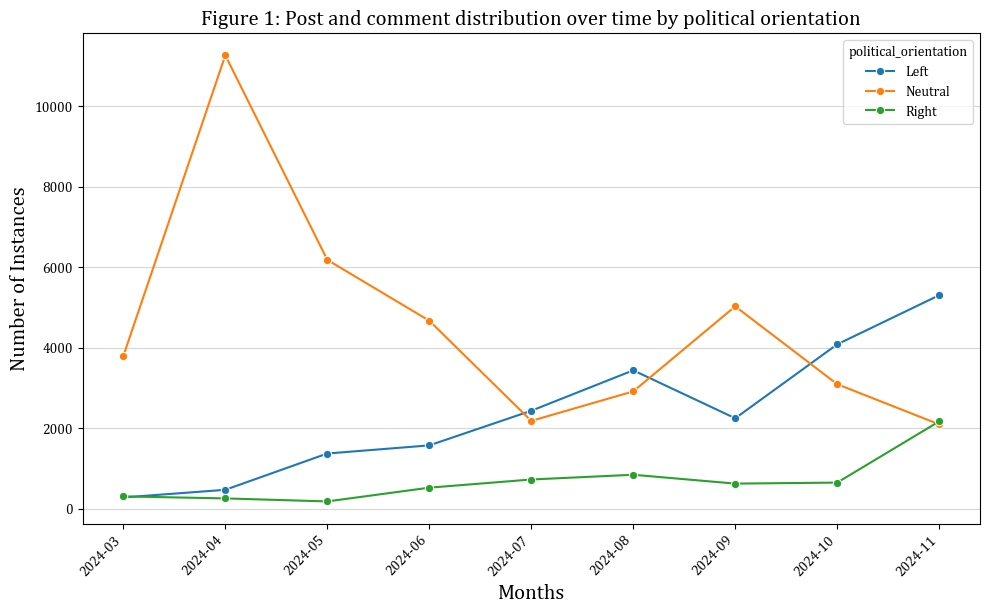

In [9]:
# Group the data by 'month_year' and 'Political orientation' and count the number of rows
df_agg_overall = df.groupby(['month_year', 'political_orientation']).size().reset_index(name='row_count')
mpl.rcParams['font.family'] = 'Cambria'

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agg_overall, x='month_year', y='row_count', hue='political_orientation', marker='o')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.xlabel('')
plt.ylabel('Number of Instances', fontsize = 15)
plt.xlabel('Months', fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.title("Figure 1: Post and comment distribution over time by political orientation", fontsize = 15)
plt.show()

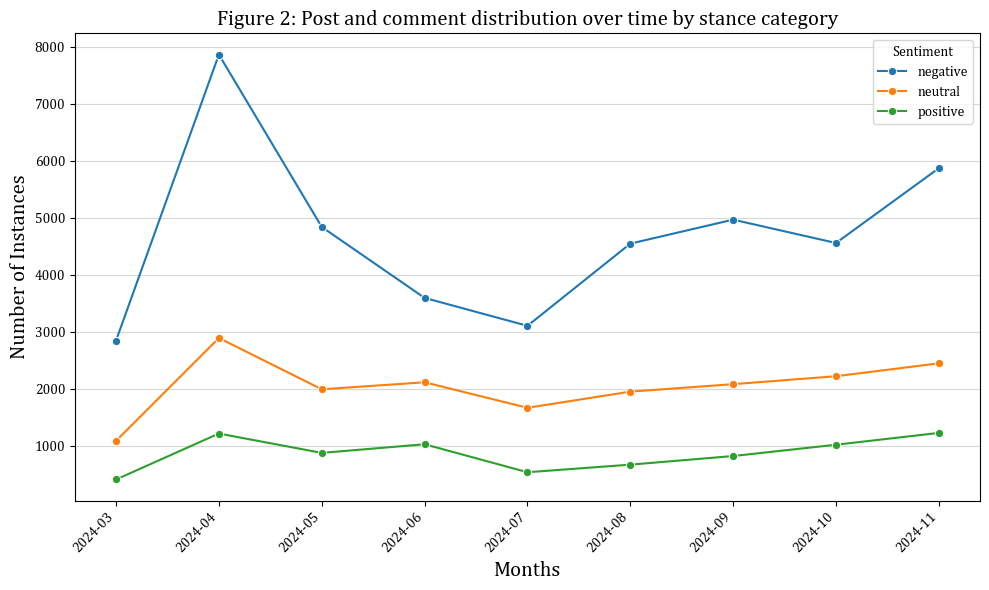

In [10]:
# Group the data by 'month_year' and 'Sentiment' and count the number of rows
df_agg_overall = df.groupby(['month_year', 'Sentiment']).size().reset_index(name='row_count')
mpl.rcParams['font.family'] = 'Cambria'

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agg_overall, x='month_year', y='row_count', hue='Sentiment', marker='o')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.xlabel('')
plt.ylabel('Number of Instances',  fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.title("Figure 2: Post and comment distribution over time by stance category", fontsize = 15)
plt.tight_layout()
plt.show()

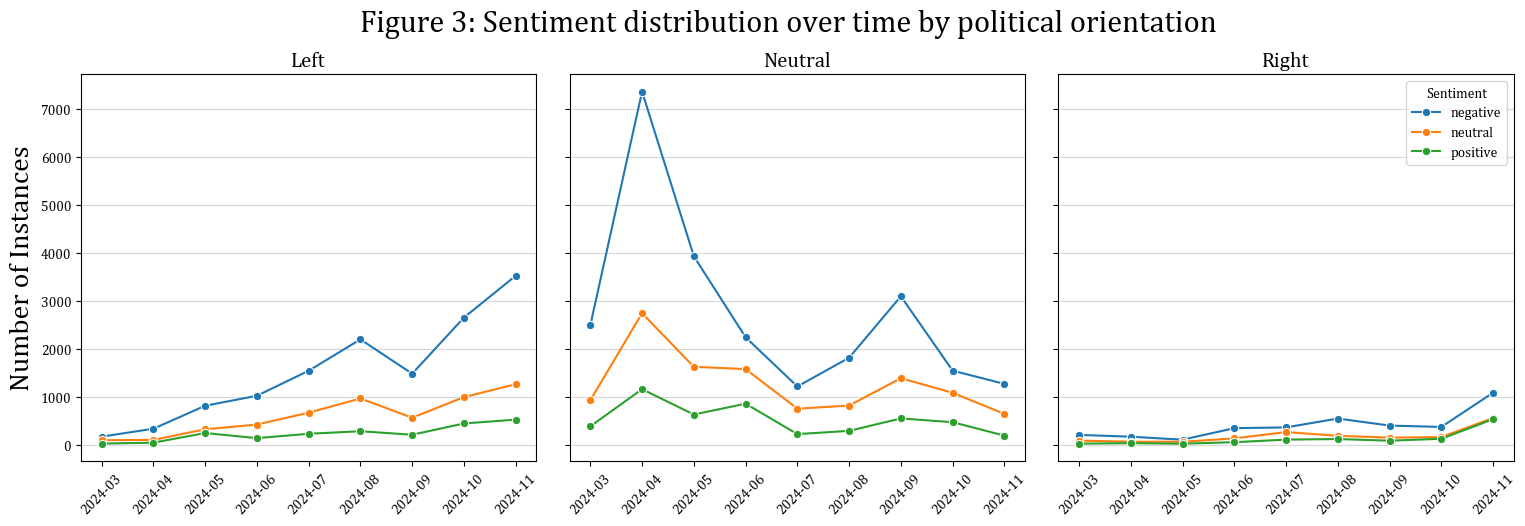

In [11]:
# Group the data by 'month_year', 'Sentiment', and 'political_orientation' and count the number of rows
df_agg = df.groupby(['month_year', 'Sentiment', 'political_orientation']).size().reset_index(name='row_count')


g, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
g.suptitle('Figure 3: Sentiment distribution over time by political orientation', fontsize=22)
g.tight_layout()

for i, orientation in enumerate(['Left', 'Neutral', 'Right']):
    df_subset = df_agg[df_agg['political_orientation'] == orientation]
    sns.lineplot(data=df_subset, x='month_year', y='row_count', hue='Sentiment', marker='o', ax=axes[i])
    
    axes[i].set_title(f'{orientation}', fontsize=15)
    
    axes[i].set_xlabel('')
    
    if i == 0:
        axes[i].set_ylabel('Number of Instances', fontsize=20)
    
    axes[i].tick_params(axis='x', rotation=45)

    axes[i].grid(axis='y', linestyle='-', alpha=0.5)

    if i < 2:
        axes[i].get_legend().remove()

plt.subplots_adjust(top=0.85)
plt.show()

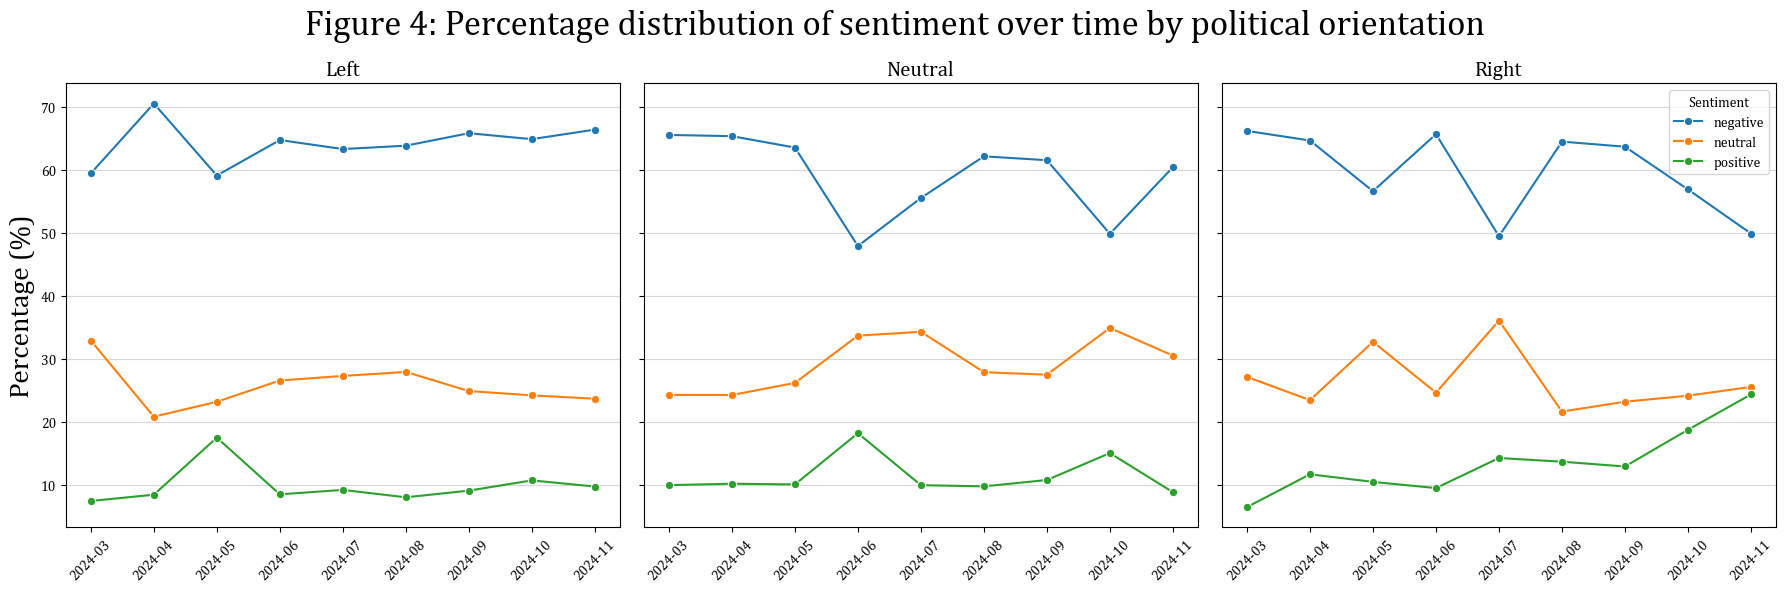

In [12]:
# Group the data by 'political_orientation', 'month_year', and 'Sentiment'
df_grouped = df.groupby(['political_orientation', 'month_year', 'Sentiment']).size().unstack(fill_value=0)
df_grouped['Total'] = df_grouped.sum(axis=1)

# Calculate the ratio for each sentiment within each month and political orientation
for col in df_grouped.columns[:-1]:
    df_grouped[f'{col}_Ratio'] = (df_grouped[col] / df_grouped['Total']) * 100

df_plot = df_grouped.reset_index().melt(
    id_vars=['political_orientation', 'month_year'],
    value_vars=[col for col in df_grouped.columns if 'Ratio' in col],
    var_name='Sentiment_Ratio',
    value_name='Ratio'
)
df_plot['Sentiment'] = df_plot['Sentiment_Ratio'].str.replace('_Ratio', '')

political_orientations = ['Left', 'Neutral', 'Right']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Figure 4: Percentage distribution of sentiment over time by political orientation', fontsize=25)
for i, orientation in enumerate(political_orientations):
    orientation_data = df_plot[df_plot['political_orientation'] == orientation]

    sns.lineplot(
        data=orientation_data,
        x='month_year',
        y='Ratio',
        hue='Sentiment',
        marker='o',
        ax=axes[i]
    )

    axes[i].grid(axis='y', linestyle='-', alpha=0.5)

    axes[i].set_title(f'{orientation}', fontsize=15)

    if i == 0:
        axes[i].set_ylabel('Percentage (%)', fontsize=20)
    else:
        axes[i].set_ylabel('')

    axes[i].set_xlabel('')

    axes[i].tick_params(axis='x', rotation=45)

    # Keep the legend only for the last subplot
    if i < 2:
        axes[i].get_legend().remove()

plt.tight_layout()

plt.show()

# Stance’s ratios in the different subreddits 

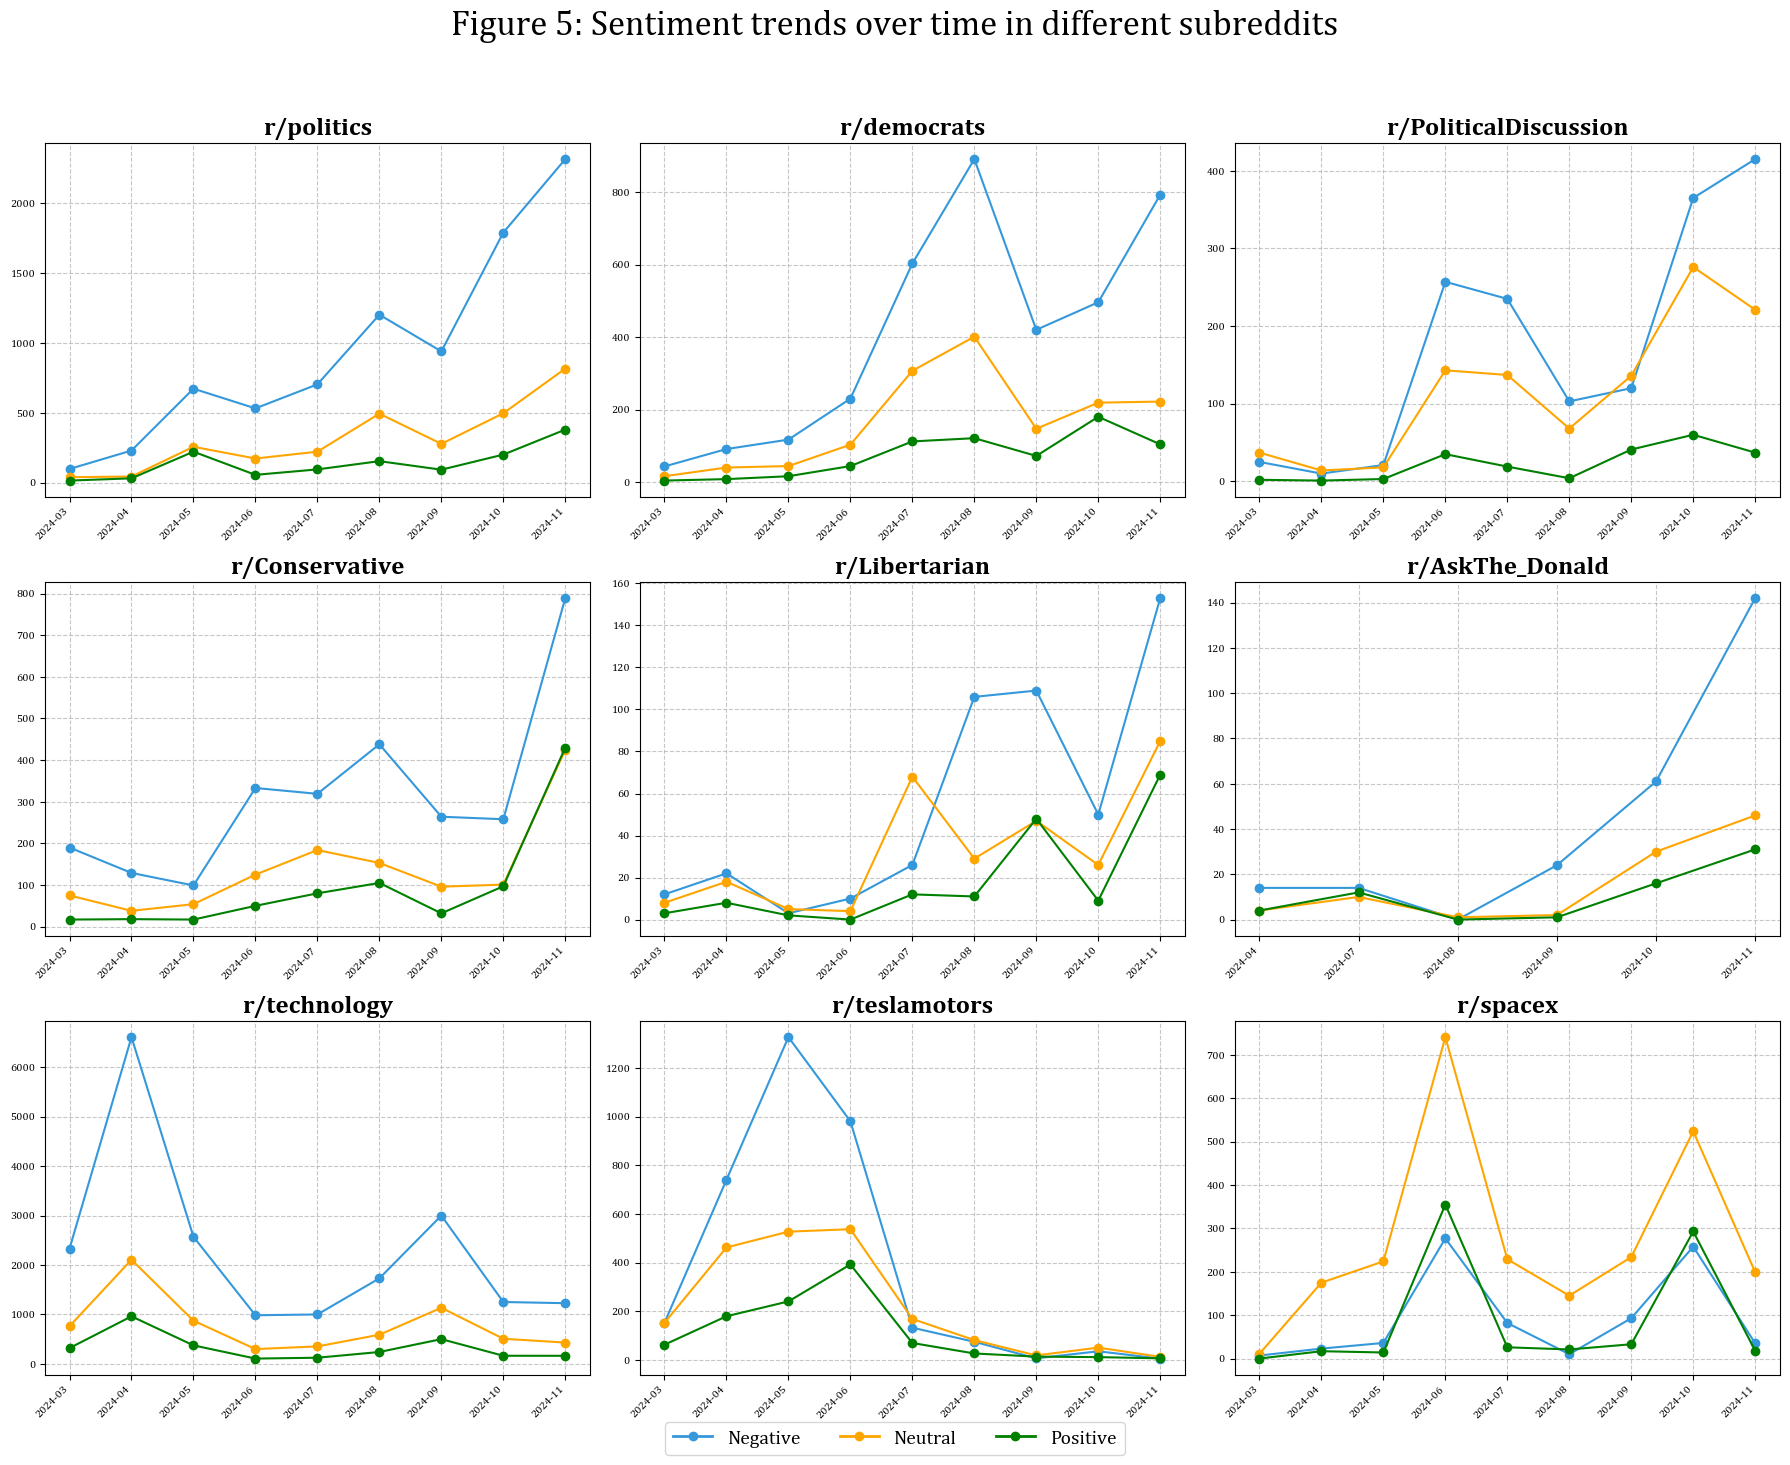

In [13]:
subreddit_orientations = {
    'Left': ['politics', 'democrats', 'PoliticalDiscussion'],
    'Right': ['Conservative', 'Libertarian', 'AskThe_Donald'],
    'Neutral': ['technology', 'teslamotors', 'spacex']
}

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Figure 5: Sentiment trends over time in different subreddits', fontsize=25)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sentiment_colors = {'negative': '#3498db', 'neutral': 'orange', 'positive': 'green'}

# Create a subplot for each subreddit
for i, (orientation, subreddits) in enumerate(subreddit_orientations.items()):
    for j, subreddit in enumerate(subreddits):
        ax = axs[i, j]

        sub_df = df[df['subreddit'] == subreddit].copy()

        # Group by month_year and sentiment
        if not sub_df.empty:
            sub_df['Sentiment'] = sub_df['Sentiment'].str.lower()

            sentiment_counts = sub_df.groupby(['month_year', 'Sentiment']).size().reset_index(name='count')

            pivot_df = sentiment_counts.pivot(index='month_year', columns='Sentiment', values='count').reset_index()
            pivot_df = pivot_df.fillna(0)

            pivot_df = pivot_df.sort_values('month_year')

            # Get the month_year labels for the current subplot
            month_year_labels = pivot_df['month_year'].unique()
            num_labels = len(month_year_labels)
            tick_positions = np.arange(num_labels)

            # Set the tick positions
            ax.set_xticks(tick_positions)

            for sentiment, color in sentiment_colors.items():
                if sentiment in pivot_df.columns:
                    ax.plot(pivot_df['month_year'], pivot_df[sentiment],
                            marker='o', linestyle='-', color=color, label=sentiment.capitalize())

            # Set the tick labels using the month_year labels
            ax.set_xticklabels(month_year_labels, rotation=45, ha='right')


        ax.set_title(f'r/{subreddit}', fontsize=18, fontweight='bold')
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.grid(True, linestyle='--', alpha=0.7)

handles, labels = [], []
for sentiment, color in sentiment_colors.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=2, marker='o'))
    labels.append(sentiment.capitalize())

fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14, bbox_to_anchor=(0.5, 0.01))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()